In [1]:
import numpy
import matplotlib

## Three body central force problem Sun-Mercury-Jupiter system

*Note* Assume the Sun is stationary at origin

Terms for Mercury, Jupiter and the Sun have subscripts M, K and S respectively

$$
\mathscr{L} = \frac{1}{2}m_M \dot{r_M}^2 + \frac{1}{2}m_M r_M^2 \dot{\theta_M}^2 + \frac{1}{2}m_J \dot{r_J}^2 + \frac{1}{2}m_J r_J^2 \dot{\theta_J}^2 + \frac{G m_S m_M}{r_M} + \frac{G m_S m_J}{r_J} + \frac{G m_J m_M}{r_{JM}}
$$

where
$$
r_{JM}^2 = r_J^2 + r_M^2 - 2r_Jr_Mcos(\theta_M - \theta_J)
$$



This gives

$$
\frac{\partial \mathscr{L}}{\dot{r_M}} = m_M \dot{r_M}
$$

$$
\frac{\partial \mathscr{L}}{\dot{r_J}} = m_J \dot{r_J}
$$

$$
\frac{\partial \mathscr{L}}{\partial \dot{\theta_M}} = m_M r_M^2 \dot{\theta_M}
$$

$$
\frac{\partial \mathscr{L}}{\partial \dot{\theta_J}} = m_J r_J^2 \dot{\theta_J}
$$

$$
\frac{\partial \mathscr{L}}{\partial r_M} = m_M r_M \dot{\theta_M}^2 - \frac{Gm_Sm_M}{r_M^2} - \frac{Gm_Jm_M}{r_{JM}^2} \frac{\partial r_{JM}}{\partial r_M}
$$

$$
\frac{\partial \mathscr{L}}{\partial r_J} = m_J r_J \dot{\theta_J}^2 - \frac{Gm_Sm_J}{r_J^2} - \frac{Gm_Jm_M}{r_{JM}^2} \frac{\partial r_{JM}}{\partial r_J}
$$

$$
\frac{\partial \mathscr{L}}{\partial \theta_M} = - \frac{Gm_Jm_M}{r_{JM}^2} \frac{\partial r_{JM}}{\partial \theta_M}
$$

$$
\frac{\partial \mathscr{L}}{\partial \theta_J} = - \frac{Gm_Jm_M}{r_{JM}^2} \frac{\partial r_{JM}}{\partial \theta_J}
$$


Where

$$
\frac{\partial r_{JM}}{\partial r_M} = \frac{r_M - r_Jcos(\theta_M - \theta_J)}{r_{JM}}
$$

$$
\frac{\partial r_{JM}}{\partial r_J} = \frac{r_J - r_Mcos(\theta_M - \theta_J)}{r_{JM}}
$$

$$
\frac{\partial r_{JM}}{\partial \theta_M} = - \frac{r_Jr_Msin(\theta_M - \theta_J)}{r_{JM}}
$$

$$
\frac{\partial r_{JM}}{\partial \theta_J} = \frac{r_Jr_Msin(\theta_M - \theta_J)}{r_{JM}}
$$

For $ r_M $

$$
\frac{d}{dt}(\frac{\partial \mathscr{L}}{\partial \dot{r_M}}) = \frac{\partial \mathscr{L}}{\partial r_M}
$$

$$
\ddot{r_M} = r_M \dot{\theta_M}^2 - \frac{Gm_S}{r_M^2} - \frac{Gm_J(r_M - r_Jcos(\theta_M - \theta_J))}{r_{JM}^3}
$$


For $ r_J $

$$
\frac{d}{dt}(\frac{\partial \mathscr{L}}{\partial \dot{r_J}}) = \frac{\partial \mathscr{L}}{\partial r_J}
$$

$$
\ddot{r_J} = r_J \dot{\theta_J}^2 - \frac{Gm_S}{r_J^2} - \frac{Gm_M(r_J - r_Mcos(\theta_M - \theta_J))}{r_{JM}^3}
$$


For $ \theta_M $

$$
\frac{d}{dt}(\frac{\partial \mathscr{L}}{\partial \dot{\theta_M}}) = \frac{\partial \mathscr{L}}{\partial \theta_M}
$$

$$
\frac{d}{dt}(r_M^2 \dot{\theta_M}) = \frac{Gm_Jr_Jr_Msin(\theta_M - \theta_J)}{r_{JM}^3}
$$


For $ \theta_J $

$$
\frac{d}{dt}(\frac{\partial \mathscr{L}}{\partial \dot{\theta_J}}) = \frac{\partial \mathscr{L}}{\partial \theta_J}
$$

$$
\frac{d}{dt}(r_J^2 \dot{\theta_J}) = - \frac{Gm_Mr_Jr_Msin(\theta_M - \theta_J)}{r_{JM}^3}
$$


Separating variables to solve ODEs. 
$$ \dot{r_M} = V_M $$
$$ \dot{r_J} = V_J $$
$$ \dot{\theta_M} = \Omega_M $$
$$ \dot{\theta_J} = \Omega_J $$
$$
\dot{V_M} = r_M \Omega_M^2 - \frac{Gm_S}{r_M^2} - \frac{Gm_J(r_M - r_Jcos(\theta_M - \theta_J))}{(r_J^2 + r_M^2 - 2r_Jr_Mcos(\theta_M - \theta_J))^\frac{3}{2}}
$$
$$
\dot{V_J} = r_J \Omega_J^2 - \frac{Gm_S}{r_J^2} - \frac{Gm_M(r_J - r_Mcos(\theta_M - \theta_J))}{(r_J^2 + r_M^2 - 2r_Jr_Mcos(\theta_M - \theta_J))^\frac{3}{2}}
$$
$$
\dot{\Omega_M} = \frac{Gm_Jr_Jr_Msin(\theta_M - \theta_J)}{r_M^2(r_J^2 + r_M^2 - 2r_Jr_Mcos(\theta_M - \theta_J))^\frac{3}{2}} - \frac{2V_M}{r_M}
$$
$$
\dot{\Omega_J} = - \frac{Gm_Mr_Jr_Msin(\theta_M - \theta_J)}{r_J^2(r_J^2 + r_M^2 - 2r_Jr_Mcos(\theta_M - \theta_J))^\frac{3}{2}} - \frac{2V_J}{r_J}
$$

This system of equations can be solved using appropriate boundary conditions

In [43]:
from scipy import integrate


def get_next(t, y):
    return t-y


rk = integrate.solve_ivp(fun=get_next, max_step=0.00001, t_span=(0., 1.), y0=[2.], rtol = 1e-5)

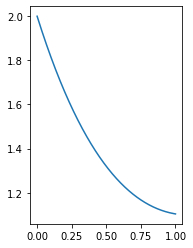

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 2, 2)
ax.plot(rk.t, rk.y[0])